In [1]:
import pandas
import read_data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
dataframe = read_data.create_frame()
dataframe

,object_name,seq_name,num_of_sequences,sequence_len,cycle,sequence_values,scenes
0,BRUMC1,BRUMC1,1,8,,"[B.27.23.B.30, A.38, G.27.30, B.24.11, B.27.28...",[1]
1,BRUMC2,BRUMC2,1,2,a,"[E.17.48.3, B.29.23.B.25]",[14]
2,BRUMC3,BRUMC3,1,2,a,"[B.29.35, B.24.5]",[13]
3,BRUMC4,BRUMC4,1,2,a,"[B.24.11, B.29.35]",[14]
4,COLA02,COLA02,1,8,,"[B.24.11, B.31.28, A.6, B.24.28.7, A.38, B.29....","[1, 5]"
...,...,...,...,...,...,...,...
250,MUNSA-0007688,MUNSA-0007688,1,8,0,"[B.24.10, B.27.25.B.30, A.36, B.24.28, B.24.11...",[9]
251,MUNSA-0007686,MUNSA-0007686,1,10,0,"[A.37, B.29.25, A.37, B.29.25, A.37, B.29.25, ...",[0]
252,HMV-63.54.12,HMV-63.54.12inf,1,16,0,"[E.31.47, B.29.25, A.19, B.31.25, E.31.47, B.2...",[0]
253,HMV-63.54.12,HMV-63.54.12cent,1,16,0,"[B.29.25, A.19, B.31.25, A.17, B.29.25, A.19, ...",[0]


In [3]:
sequences = dataframe['sequence_values']
names = dataframe['seq_name']
list_s = sequences.tolist()
sentences = [' '.join(string_list) for string_list in list_s]
print(sentences)
print(type(sentences))
print(type(sentences[0]))

['B.27.23.B.30 A.38 G.27.30 B.24.11 B.27.28.30.B.30 A.4 H.24.28 B.24.12', 'E.17.48.3 B.29.23.B.25', 'B.29.35 B.24.5', 'B.24.11 B.29.35', 'B.24.11 B.31.28 A.6 B.24.28.7 A.38 B.29.30.10 E.31.20 B.27.30', 'B.24.28.30 C.24.1 G.29.30.52 A.36 B.27.23 B.24.11 B.29.23 E.17', 'A.1.16 C.29 A.36 B.24.28 A.6 G.29.52 B.24.11 B.27.30 A.38 B.29.23', 'A.1.16 C.29 A.36 B.24.28 A.6 G.29.52 B.24.11 B.27.30 A.38 B.29.23.B.30', 'B.29.25 B.24.25', 'B.31.21 B.27.30 B.31.21 B.27.30', 'B.24.11 A.36 B.24.11 A.36', 'B.24.28.10 E.17.3 B.29.34', 'E.17.48 B.29.23', 'E.17.3 B.29.35', 'B.24.11 B.29.23.B.25', 'B.29.25 E.17.3', 'A.1 B.24.11 B.27.30 B.29.30 B.24.10.7 A.36 A.6 H.24.28', 'E.17.48.3 B.29.25', 'B.29.25 E.17', 'A.17.3 B.29.25', 'B.29.25 E.17.48.3', 'B.29.25 E.17.3', 'B.24.25.B.11 B.29.23.B.25', 'E.17.48.3 B.29.23.B.25', 'A.36.3 B.29.25', 'B.29.35.B.25 E.17', 'E.17.3 B.29.23.25.B.25', 'E.17 B.29.23.B.25', 'E.17.48.3 B.29.23.B.25', 'B.29.23.B.25 E.17', 'E.17.3 B.29.23.B.25', 'E.17.3 B.29.23.B.25', 'E.17.3 B.29

In [4]:
def custom_tokenizer(text):
    return text.split()

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
X = vectorizer.fit_transform(sentences)
print(X[1])
feature_names = vectorizer.get_feature_names_out()

print("Counts features in vectorizer:", len(feature_names))
print(type(X))
print(type(X[0]))
print(X[0])
sentence_vectors = X.toarray()

  (0, 90)	0.5414024512506003
  (0, 143)	0.8407635730571595
Counts features in vectorizer: 170
<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>
  (0, 51)	0.35622765289267644
  (0, 160)	0.3090880851097673
  (0, 39)	0.3260999722721223
  (0, 77)	0.47945667059234665
  (0, 48)	0.17520381836696658
  (0, 152)	0.44623692598960807
  (0, 37)	0.21907881201283566
  (0, 75)	0.40438499738046635


/home/zuzaw/mini_hackathon/Bootcamp-mini-hackathon-2024/.venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [5]:
n_clusters = 4
kmeans = KMeans(n_clusters, random_state=0)
kmeans.fit(sentence_vectors)

KMeans(n_clusters=4, random_state=0)

In [6]:
labels = kmeans.labels_
output = zip(sentence_vectors, labels)

vectors_by_clusters = [[] for _ in range(n_clusters)]
names_by_clusters = [[] for _ in range(n_clusters)]
seq_values_by_clusters = [[] for _ in range(n_clusters)]

for i in range(len(sentence_vectors)):
    vector = sentence_vectors[i]
    cluster_id = labels[i]
    vectors_by_clusters[cluster_id].append(vector)
    name = names[i]
    names_by_clusters[cluster_id].append(name)
    seq = sequences[i]
    seq_values_by_clusters[cluster_id].append(seq)


for num in range(n_clusters):
    print(f"Cluster {num}:")
    for name, val in zip(names_by_clusters[num], seq_values_by_clusters[num]):
        print(f"{name} {val}")

cluster_mean = []
for num in range(n_clusters):
    vectors_in_cluster = vectors_by_clusters[num]
    mean = np.mean(vectors_in_cluster, axis=0)
    cluster_mean.append(mean)

Cluster 0:
BRUMC2 ['E.17.48.3', 'B.29.23.B.25']
COLA46 ['B.24.11', 'B.29.23.B.25']
COLA62 ['B.24.25.B.11', 'B.29.23.B.25']
COLA63 ['E.17.48.3', 'B.29.23.B.25']
EMB-VA11811 ['E.17', 'B.29.23.B.25']
EMB-VA12368 ['E.17.48.3', 'B.29.23.B.25']
EMB-VA12369 ['B.29.23.B.25', 'E.17']
EMB-VA12370 ['E.17.3', 'B.29.23.B.25']
EMB-VA12430 ['E.17.3', 'B.29.23.B.25']
EMB-VA12462 ['E.17.3', 'B.29.23.B.25']
EMB-VA12463 ['E.17.3', 'B.29.23.B.25']
EMB-VA12606 ['E.17.3', 'B.29.23.B.25']
EMB-VA12724 ['E.17.3', 'B.29.23.B.25']
MKSL364 ['A.17.3', 'B.29.23.B.25']
ML400678 ['E.17.3', 'B.29.23.B.25']
MPR965 ['B.24.11', 'B.29.23.B.25']
MTMNA-1001-CFD15784 ['E.17.48', 'B.29.23.B.25']
MTMNA-1002-CFD-15775 ['E.17', 'B.29.23.B.25']
MTMNA-16?0-624 ['E.17', 'B.29.23.B.25']
MTMNA-1635-579 ['E.17.48', 'B.29.23.B.25']
MTMNA-1637-581 ['E.17', 'B.29.23.B.25']
MTMNA-1640-584 ['E.17.3', 'B.29.23.B.25']
MTMNA-1687-631 ['E.17.48', 'B.29.23.B.25']
MTMNA-1706-650 ['E.17', 'B.29.23.B.25']
MTMNA-1712-656 ['B.24', 'B.29.23.B.25']
MT

Obserwacje z clusteringu
- W klustrze 0 - każda sekwencja zawiera znak 'B.29.23.B.25' mają 2 znaki
- w klustrze 1
- W klustrze 2 - często pojawiają się 'B.29.X' {35, 25, 34, 23, 23.25.B.25, 115} cztery razy 'B.24.11' dwa razy B.31.28.30'
- w klustrze 3 - 'A.X' {6, 36, 38}

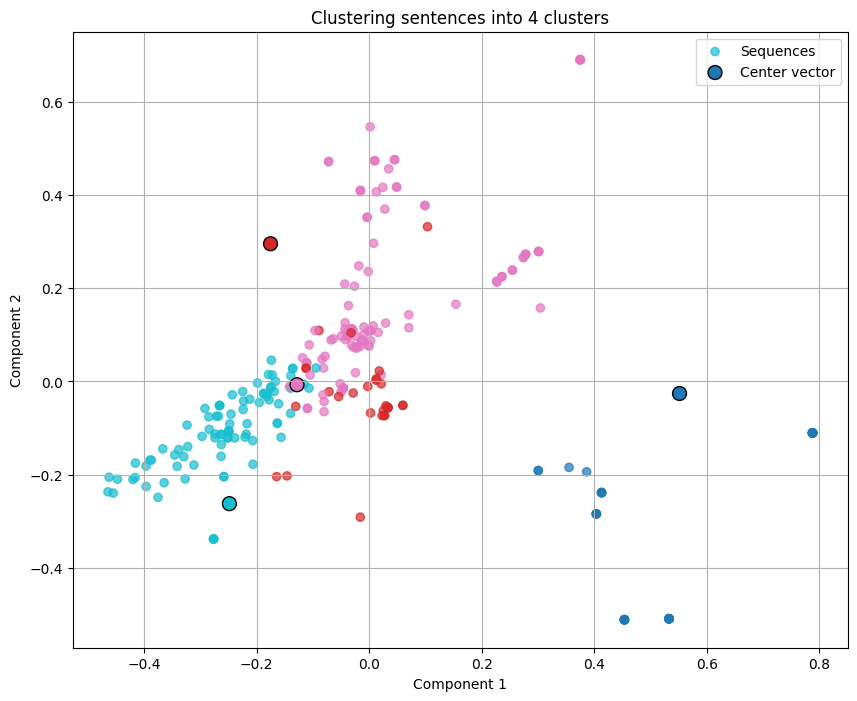

In [7]:

pca = PCA(n_components=2)
cluster_centers = kmeans.cluster_centers_
centers_2d = pca.fit_transform(cluster_centers)
vectors_2d = pca.fit_transform(sentence_vectors)

colors = np.arange(n_clusters) % 10

plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=labels, cmap='tab10', alpha=0.7, label='Sequences')
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], s=100, c=colors, marker='o', cmap='tab10', edgecolors='black', label='Center vector')
plt.legend()

plt.title(f'Clustering sentences into {n_clusters} clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.savefig('name.png')
plt.show()
